In [60]:
# importing libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [4]:
# read data
data = pd.read_csv("netflix_titles.csv", encoding="latin1", index_col="show_id")
data.head()

,type,title,director,cast,country,date_added,release_year,rating,duration,listed_in,description
show_id,,,,,,,,,,,
s1,Movie,Dick Johnson Is Dead,Kirsten Johnson,NaN,United States,25-Sep-21,2020,PG-13,90 min,Documentaries,"As her father nears the end of his life, filmm..."
s2,TV Show,Blood & Water,NaN,"Ama Qamata, Khosi Ngema, Gail Mabalane, Thaban...",South Africa,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, TV Dramas, TV Mysteries","After crossing paths at a party, a Cape Town t..."
s3,TV Show,Ganglands,Julien Leclercq,"Sami Bouajila, Tracy Gotoas, Samuel Jouy, Nabi...",NaN,24-Sep-21,2021,TV-MA,1 Season,"Crime TV Shows, International TV Shows, TV Act...",To protect his family from a powerful drug lor...
s4,TV Show,Jailbirds New Orleans,NaN,NaN,NaN,24-Sep-21,2021,TV-MA,1 Season,"Docuseries, Reality TV","Feuds, flirtations and toilet talk go down amo..."
s5,TV Show,Kota Factory,NaN,"Mayur More, Jitendra Kumar, Ranjan Raj, Alam K...",India,24-Sep-21,2021,TV-MA,2 Seasons,"International TV Shows, Romantic TV Shows, TV ...",In a city of coaching centers known to train I...


In [8]:
data.shape

(8809, 11)

In [11]:
data["date_added"] = pd.to_datetime(data["date_added"])

C:\Users\ahmed_gamal\AppData\Local\Temp\ipykernel_7236\1202917360.py:1: UserWarning: Could not infer format, so each element will be parsed individually, falling back to `dateutil`. To ensure parsing is consistent and as-expected, please specify a format.
  data["date_added"] = pd.to_datetime(data["date_added"])


In [36]:
data.info()

<class 'pandas.core.frame.DataFrame'>
Index: 8809 entries, s1 to s8809
Data columns (total 11 columns):
 #   Column        Non-Null Count  Dtype         
---  ------        --------------  -----         
 0   type          8809 non-null   object        
 1   title         8809 non-null   object        
 2   director      6175 non-null   object        
 3   cast          7984 non-null   object        
 4   country       7978 non-null   object        
 5   date_added    8799 non-null   datetime64[ns]
 6   release_year  8809 non-null   int64         
 7   rating        8805 non-null   object        
 8   duration      8806 non-null   object        
 9   listed_in     8809 non-null   object        
 10  description   8809 non-null   object        
dtypes: datetime64[ns](1), int64(1), object(9)
memory usage: 1.1+ MB


In [37]:
data["type"].value_counts()

type
Movie      6132
TV Show    2677
Name: count, dtype: int64

In [38]:
data["director"].value_counts()

director
Rajiv Chilaka                     19
RaÃºl Campos, Jan Suter           18
Marcus Raboy                      16
Suhas Kadav                       16
Jay Karas                         14
                                  ..
Raymie Muzquiz, Stu Livingston     1
Joe Menendez                       1
Eric Bross                         1
Will Eisenberg                     1
Yeon Sang-ho                       1
Name: count, Length: 4529, dtype: int64

In [39]:
data["rating"].value_counts()

rating
TV-MA       3208
TV-14       2160
TV-PG        863
R            799
PG-13        490
TV-Y7        334
TV-Y         307
PG           287
TV-G         220
NR            80
G             41
TV-Y7-FV       6
NC-17          3
UR             3
74 min         1
84 min         1
66 min         1
A              1
Name: count, dtype: int64

In [41]:
for col in data.columns:
    print(f"this column {col} is contain {data[col].isna().sum()} Null")

this column type is contain 0 Null
this column title is contain 0 Null
this column director is contain 2634 Null
this column cast is contain 825 Null
this column country is contain 831 Null
this column date_added is contain 10 Null
this column release_year is contain 0 Null
this column rating is contain 4 Null
this column duration is contain 3 Null
this column listed_in is contain 0 Null
this column description is contain 0 Null


In [43]:
data.columns

Index(['type', 'title', 'director', 'cast', 'country', 'date_added',
       'release_year', 'rating', 'duration', 'listed_in', 'description'],
      dtype='object')

In [44]:
columns = ["type", "country", "rating"]
for col in columns:
    print(f"unique values in this column is {col} is contain \n {data[col].unique()}")

unique values in this column is type is contain 
 ['Movie' 'TV Show']
unique values in this column is country is contain 
 ['United States' 'South Africa' nan 'India'
 'United States, Ghana, Burkina Faso, United Kingdom, Germany, Ethiopia'
 'United Kingdom' 'Germany, Czech Republic' 'Mexico' 'Turkey' 'Australia'
 'United States, India, France' 'Finland' 'China, Canada, United States'
 'South Africa, United States, Japan' 'Nigeria' 'Japan'
 'Spain, United States' 'France' 'Belgium' 'United Kingdom, United States'
 'United States, United Kingdom' 'France, United States' 'South Korea'
 'Spain' 'United States, Singapore' 'United Kingdom, Australia, France'
 'United Kingdom, Australia, France, United States'
 'United States, Canada' 'Germany, United States'
 'South Africa, United States' 'United States, Mexico'
 'United States, Italy, France, Japan'
 'United States, Italy, Romania, United Kingdom'
 'Australia, United States' 'Argentina, Venezuela'
 'United States, United Kingdom, Canada' 'C

<Axes: xlabel='release_year'>

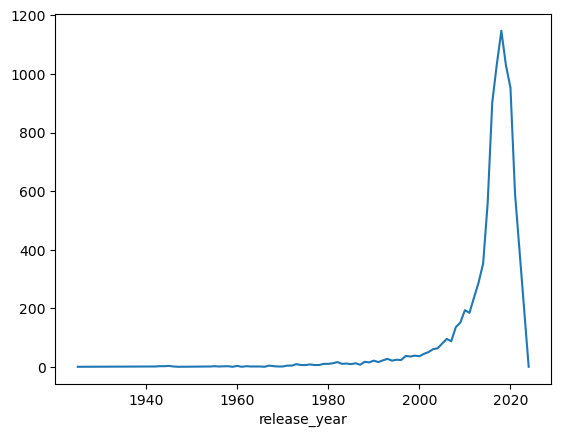

In [45]:
data.release_year.value_counts().sort_index().plot()

<Axes: xlabel='date_added'>

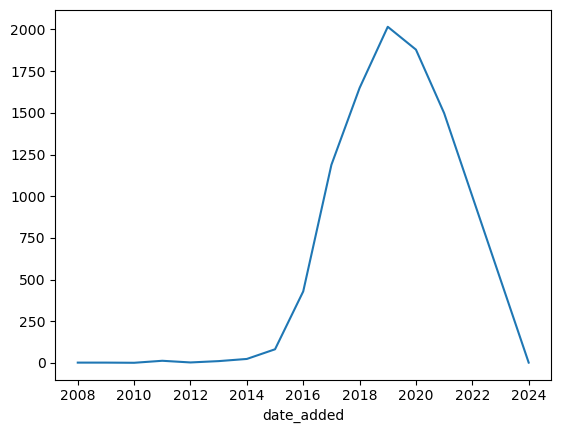

In [46]:
data.date_added.dt.year.value_counts().sort_index().plot()

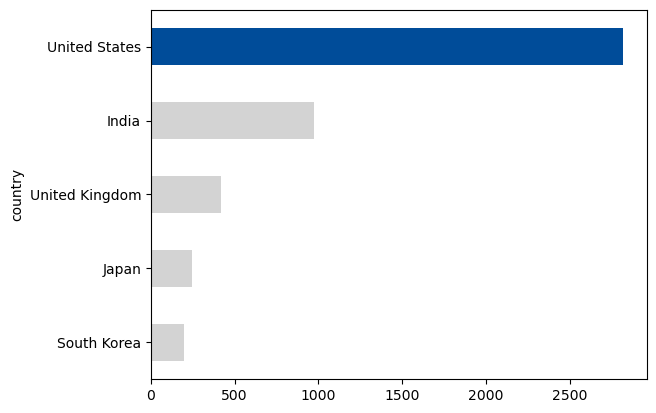

In [50]:
ax = data.country.value_counts().nlargest(5).sort_values(ascending=True).plot(kind='barh', color="lightgray")
bars = ax.patches
bars[-1].set_facecolor('#004c99')

<Axes: >

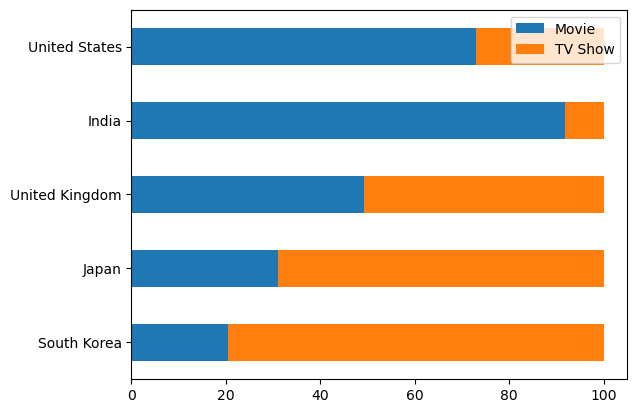

In [51]:
index = []
row = []
for c in ['United States', 'India', 'United Kingdom', 'Japan', 'South Korea'][::-1]:
  cnt = data[data.country == c].type.value_counts()  
  total = cnt['Movie'] + cnt['TV Show']
  index.append(c)
  row.append([cnt['Movie']/total*100, cnt['TV Show']/total*100,] )
cnt = pd.DataFrame(row, columns=['Movie', 'TV Show'], index=index)
cnt.plot(kind='barh', stacked=True)

<Axes: ylabel='rating'>

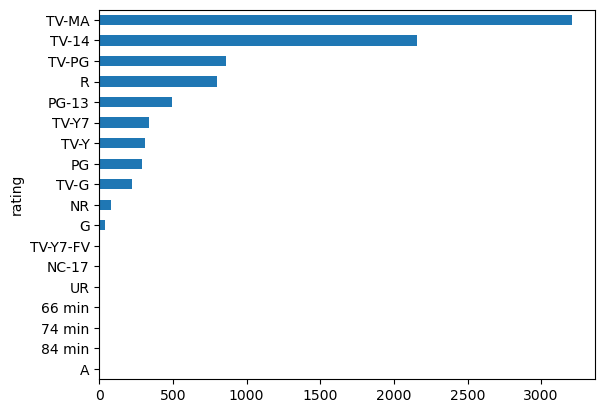

In [53]:
data.rating.value_counts().sort_values().plot(kind='barh')

<Axes: ylabel='Frequency'>

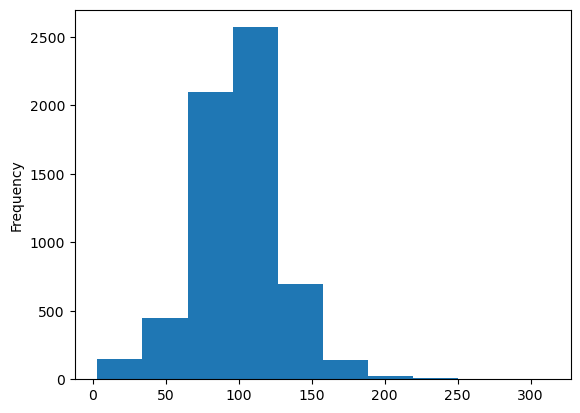

In [55]:
movie = data[data.type=='Movie'].copy()
movie.duration = movie.duration.str.split(expand=True)[0]
movie.duration = pd.to_numeric(movie.duration)
movie.duration.plot(kind='hist')

<Axes: xlabel='len_cat'>

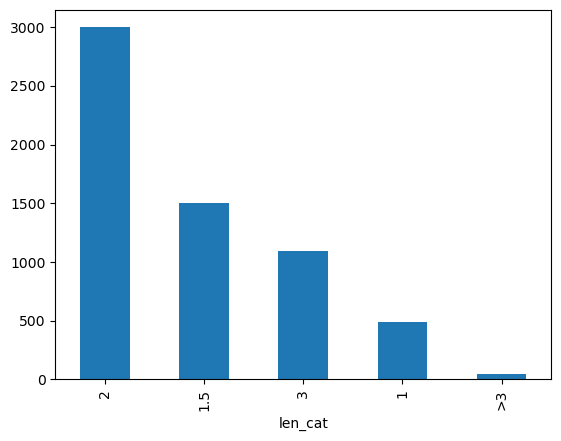

In [56]:
def len_cat(x):
    if x <= 60:
        return "1"
    elif x <= 90:
        return "1.5"
    elif x <= 120:
        return "2"
    elif x <= 180:
        return "3"
    else:
        return ">3"
movie['len_cat'] = movie.duration.apply(len_cat)
movie['len_cat'].value_counts().plot(kind='bar')

In [58]:
director = data.director.value_counts().nlargest(10).to_frame().reset_index()
director

,director,count
0,Rajiv Chilaka,19
1,"RaÃºl Campos, Jan Suter",18
2,Marcus Raboy,16
3,Suhas Kadav,16
4,Jay Karas,14
5,Cathy Garcia-Molina,13
6,Youssef Chahine,12
7,Martin Scorsese,12
8,Jay Chapman,12
9,Steven Spielberg,11


In [59]:
(
    director
    .merge( data.dropna(subset='country').drop_duplicates(subset='director'), how='left', on='director')[['director','count','country']].head
)

<bound method NDFrame.head of                   director  count        country
0            Rajiv Chilaka     19          India
1  RaÃºl Campos, Jan Suter     18         Mexico
2             Marcus Raboy     16  United States
3              Suhas Kadav     16          India
4                Jay Karas     14  United States
5      Cathy Garcia-Molina     13    Philippines
6          Youssef Chahine     12          Egypt
7          Martin Scorsese     12  United States
8              Jay Chapman     12  United States
9         Steven Spielberg     11  United States>

In [61]:
data.to_csv("Netflix.csv")